In [39]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
df=pd.read_csv('/diagnosed_cbc_data_v4.csv')

In [6]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


In [7]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [8]:
print("Veri seti boyutu:", df.shape)
print("\nSütunlar:", df.columns.tolist())
print("\nVeri tipleri:\n", df.dtypes)

Veri seti boyutu: (1281, 15)

Sütunlar: ['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT', 'Diagnosis']

Veri tipleri:
 WBC          float64
LYMp         float64
NEUTp        float64
LYMn         float64
NEUTn        float64
RBC          float64
HGB          float64
HCT          float64
MCV          float64
MCH          float64
MCHC         float64
PLT          float64
PDW          float64
PCT          float64
Diagnosis     object
dtype: object


In [9]:
for column in df.columns:
    n_unique = df[column].nunique()
    print(f"{column}: {n_unique} benzersiz değer")
    if n_unique < 10:
        print(df[column].unique())
    print()

df['Diagnosis'] = df['Diagnosis'].astype('category')

print("\nGüncellenmiş veri tipleri:")
print(df.dtypes)

WBC: 278 benzersiz değer

LYMp: 263 benzersiz değer

NEUTp: 267 benzersiz değer

LYMn: 51 benzersiz değer

NEUTn: 103 benzersiz değer

RBC: 272 benzersiz değer

HGB: 116 benzersiz değer

HCT: 206 benzersiz değer

MCV: 317 benzersiz değer

MCH: 191 benzersiz değer

MCHC: 126 benzersiz değer

PLT: 291 benzersiz değer

PDW: 104 benzersiz değer

PCT: 40 benzersiz değer

Diagnosis: 9 benzersiz değer
['Normocytic hypochromic anemia' 'Iron deficiency anemia'
 'Other microcytic anemia' 'Leukemia' 'Healthy' 'Thrombocytopenia'
 'Normocytic normochromic anemia' 'Leukemia with thrombocytopenia'
 'Macrocytic anemia']


Güncellenmiş veri tipleri:
WBC           float64
LYMp          float64
NEUTp         float64
LYMn          float64
NEUTn         float64
RBC           float64
HGB           float64
HCT           float64
MCV           float64
MCH           float64
MCHC          float64
PLT           float64
PDW           float64
PCT           float64
Diagnosis    category
dtype: object


In [11]:
print("Kayıp gözlem sayıları:")
print(df.isnull().sum())

print("\nKayıp gözlem oranları (%):")
print((df.isnull().sum() / len(df) * 100).round(2))


eksik_satirlar = df[df.isnull().any(axis=1)].shape[0]
toplam_satir = df.shape[0]
print(f"\nKayıp veri içeren satır sayısı: {eksik_satirlar}")
print(f"Toplam satır sayısı: {toplam_satir}")
print(f"Kayıp veri içeren satırların oranı: {(eksik_satirlar/toplam_satir*100):.2f}%")

Kayıp gözlem sayıları:
WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

Kayıp gözlem oranları (%):
WBC          0.0
LYMp         0.0
NEUTp        0.0
LYMn         0.0
NEUTn        0.0
RBC          0.0
HGB          0.0
HCT          0.0
MCV          0.0
MCH          0.0
MCHC         0.0
PLT          0.0
PDW          0.0
PCT          0.0
Diagnosis    0.0
dtype: float64

Kayıp veri içeren satır sayısı: 0
Toplam satır sayısı: 1281
Kayıp veri içeren satırların oranı: 0.00%


In [12]:
sayisal_sutunlar = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = df[sayisal_sutunlar].apply(lambda x: np.abs((x - x.mean()) / x.std()))

print("Her değişken için aykırı değer sayısı (|z| > 3):")
print((z_scores > 3).sum())

Her değişken için aykırı değer sayısı (|z| > 3):
WBC      22
LYMp     16
NEUTp     2
LYMn      5
NEUTn     8
RBC       3
HGB       6
HCT       2
MCV       2
MCH       2
MCHC     10
PLT       6
PDW       5
PCT       4
dtype: int64


In [14]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

for column in sayisal_sutunlar:
    fig.add_trace(go.Box(
        y=df[column],
        name=column,
        boxpoints='outliers',
        hovertemplate=
        f"<b>{column}</b><br>" +
        "Değer: %{y}<br>" +
        "Index: %{text}<br>" +
        "<extra></extra>",
        text=df.index
    ))

fig.update_layout(
    title='Değişkenlerin Kutu Grafikleri (İnteraktif)',
    yaxis_title='Değerler',
    showlegend=False,
    height=600,
    width=1000
)

fig.show()

In [21]:
correlation_matrix = df[sayisal_sutunlar].corr()
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    zmin=-1,
    zmax=1,
    text=correlation_matrix.round(2),  # Gösterilecek değerler
    texttemplate='%{text}',           # Değerleri metin olarak göster
    textfont={"size":10},            # Metin boyutu
    hoverongaps=False,
    hovertemplate='x: %{x}<br>y: %{y}<br>Korelasyon: %{z:.3f}<extra></extra>',
    colorscale='RdBu_r'
))

fig.update_layout(
    title='Bağımsız Değişkenler Arası Korelasyon Matrisi',
    width=800,
    height=800,
    xaxis_title='Değişkenler',
    yaxis_title='Değişkenler'
)

fig.show()


In [24]:
print("Diagnosis değerlerinin dağılımı:")
print(df['Diagnosis'].value_counts())
print("\nBenzersiz değerler:")
print(df['Diagnosis'].unique())

Diagnosis değerlerinin dağılımı:
Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64

Benzersiz değerler:
['Normocytic hypochromic anemia', 'Iron deficiency anemia', 'Other microcytic anemia', 'Leukemia', 'Healthy', 'Thrombocytopenia', 'Normocytic normochromic anemia', 'Leukemia with thrombocytopenia', 'Macrocytic anemia']
Categories (9, object): ['Healthy', 'Iron deficiency anemia', 'Leukemia',
                         'Leukemia with thrombocytopenia', ..., 'Normocytic hypochromic anemia',
                         'Normocytic normochromic anemia', 'Other microcytic anemia', 'Thrombocytopenia']


In [25]:
from scipy import stats

df['Diagnosis'] = df['Diagnosis'].astype('category')

# İstatistiksel test sonuçlarını saklamak için bir sözlük oluşturalım
test_sonuclari = {}

# Sayısal değişkenler için Kruskal-Wallis testi
for column in sayisal_sutunlar:
    statistic, p_value = stats.kruskal(*[group[column].values
                                       for name, group in df.groupby('Diagnosis')])

    test_sonuclari[column] = {
        'test_type': 'Kruskal-Wallis',
        'statistic': statistic,
        'p_value': p_value
    }

# Sonuçları DataFrame'e çevirelim
sonuclar_df = pd.DataFrame.from_dict(test_sonuclari, orient='index')
sonuclar_df = sonuclar_df.sort_values('p_value')

print("İstatistiksel Test Sonuçları:")
print(sonuclar_df)

İstatistiksel Test Sonuçları:
            test_type   statistic        p_value
HGB    Kruskal-Wallis  968.770490  8.208710e-204
MCH    Kruskal-Wallis  802.919686  4.833145e-168
MCV    Kruskal-Wallis  752.617214  3.335774e-157
MCHC   Kruskal-Wallis  727.958311  6.831623e-152
RBC    Kruskal-Wallis  658.721829  5.485283e-137
HCT    Kruskal-Wallis  457.250574   1.033314e-93
PLT    Kruskal-Wallis  413.675890   2.220626e-84
PCT    Kruskal-Wallis  328.628309   3.281680e-66
NEUTp  Kruskal-Wallis  241.307622   1.196823e-47
WBC    Kruskal-Wallis  219.873971   4.094098e-43
NEUTn  Kruskal-Wallis  121.000257   2.060407e-22
PDW    Kruskal-Wallis   72.801205   1.357846e-12
LYMn   Kruskal-Wallis   51.457397   2.141981e-08
LYMp   Kruskal-Wallis   39.925535   3.307679e-06


<ipython-input-25-268ac4f70c3e>:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [26]:
import plotly.graph_objects as go

sonuclar_df['-log10_p'] = -np.log10(sonuclar_df['p_value'])

alpha = 0.05
bonferroni_threshold = -np.log10(alpha / len(sayisal_sutunlar))

fig = go.Figure()

fig.add_trace(go.Bar(
    x=sonuclar_df.index,
    y=sonuclar_df['-log10_p'],
    text=sonuclar_df['p_value'].round(4),
    hovertemplate="Değişken: %{x}<br>" +
                  "-log10(p-değeri): %{y:.3f}<br>" +
                  "p-değeri: %{text}<br>" +
                  "<extra></extra>",
    marker_color=['red' if p < alpha/len(sayisal_sutunlar) else 'blue'
                 for p in sonuclar_df['p_value']]
))

fig.add_hline(y=bonferroni_threshold,
              line_dash="dash",
              line_color="red",
              annotation_text="Bonferroni eşiği")

fig.update_layout(
    title='Değişkenlerin İstatistiksel Anlamlılık Düzeyleri',
    xaxis_title='Değişkenler',
    yaxis_title='-log10(p-değeri)',
    width=1000,
    height=600
)

fig.show()

In [27]:
# En anlamlı bulunan ilk 5 değişken için kutu grafikleri
en_anlamli_5 = sonuclar_df.head(5).index

fig = go.Figure()

for column in en_anlamli_5:
    fig.add_trace(go.Box(
        y=df[column],
        x=df['Diagnosis'],
        name=column,
        boxpoints='outliers',
        hovertemplate=
        f"<b>{column}</b><br>" +
        "Tanı: %{x}<br>" +
        "Değer: %{y}<br>" +
        "<extra></extra>"
    ))

fig.update_layout(
    title='En Anlamlı 5 Değişken için Kutu Grafikleri',
    yaxis_title='Değerler',
    xaxis_title='Tanı',
    width=1200,
    height=800
)

# x ekseni etiketlerini döndür
fig.update_xaxes(tickangle=45)

fig.show()

In [29]:
ortalamalar = df.groupby('Diagnosis')[sayisal_sutunlar].mean().round(2)

# Farklı metriklerde bulunduğu için normalize etmem gerekiyor.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ortalamalar_norm = pd.DataFrame(
    scaler.fit_transform(ortalamalar),
    columns=ortalamalar.columns,
    index=ortalamalar.index
)

fig = go.Figure(data=go.Heatmap(
    z=ortalamalar_norm,
    x=ortalamalar_norm.columns,
    y=ortalamalar_norm.index,
    text=ortalamalar.values,
    texttemplate="%{text}",
    textfont={"size":10},
    hoverongaps=False,
    hovertemplate="Tanı: %{y}<br>" +
                  "Değişken: %{x}<br>" +
                  "Değer: %{text}<br>" +
                  "<extra></extra>",
    colorscale='RdYlBu_r'
))

fig.update_layout(
    title='Hastalık Gruplarına Göre Ortalama Değerler',
    xaxis_title='Değişkenler',
    yaxis_title='Tanı',
    width=1200,
    height=600
)

fig.show()

<ipython-input-29-5e4ab77bbe83>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [31]:
fig = go.Figure()

for tani in ortalamalar_norm.index:
    fig.add_trace(go.Scatterpolar(
        r=ortalamalar_norm.loc[tani],
        theta=ortalamalar_norm.columns,
        name=tani,
        fill='toself',
        hovertemplate="Tanı: %{fullData.name}<br>" +
                      "Değişken: %{theta}<br>" +
                      "Normalize Değer: %{r:.2f}<br>" +
                      "<extra></extra>"
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Hastalık Gruplarına Göre Değerler',
    width=1000,
    height=800
)

fig.show()

In [32]:
fig = go.Figure()

for col in sayisal_sutunlar:
    fig.add_trace(go.Box(
        y=df[col],
        x=df['Diagnosis'],
        name=col,
        boxpoints='outliers',
        hovertemplate="Tanı: %{x}<br>" +
                      "Değer: %{y}<br>" +
                      "<extra></extra>"
    ))


    fig.update_layout(
        updatemenus=[{
            'buttons': [
                {'label': column,
                 'method': 'update',
                 'args': [{'visible': [column == col for column in sayisal_sutunlar]},
                         {'title': f'{column} Değerlerinin Hastalık Gruplarına Göre Dağılımı'}]}
                for column in sayisal_sutunlar
            ],
            'direction': 'down',
            'showactive': True,
        }]
    )

fig.update_layout(
    title='Değişkenlerin Hastalık Gruplarına Göre Dağılımı',
    xaxis_title='Tanı',
    yaxis_title='Değer',
    width=1200,
    height=600
)

fig.update_xaxes(tickangle=45)
fig.show()

In [34]:
# Sağlıklı bireylerin referan aralıkları ort +- 2 std
saglikli = df[df['Diagnosis'] == 'Healthy'][sayisal_sutunlar]
referans_araliklar = pd.DataFrame({
    'ortalama': saglikli.mean(),
    'alt_sinir': saglikli.mean() - 2*saglikli.std(),
    'ust_sinir': saglikli.mean() + 2*saglikli.std()
})


anormal_degerler = {}

for hastalik in df['Diagnosis'].unique():
    if hastalik != 'Healthy':
        hasta_grup = df[df['Diagnosis'] == hastalik][sayisal_sutunlar]
        ortalamalar = hasta_grup.mean()
        anormallikler = pd.DataFrame({
            'ortalama': ortalamalar,
            'durum': ['Normal' if (alt <= ort <= ust) else
                     'Yüksek' if ort > ust else 'Düşük'
                     for ort, alt, ust in zip(ortalamalar,
                                            referans_araliklar['alt_sinir'],
                                            referans_araliklar['ust_sinir'])],
            'fark_yuzde': ((ortalamalar - referans_araliklar['ortalama']) /
                          referans_araliklar['ortalama'] * 100).round(2)
        })

        anormal_degerler[hastalik] = anormallikler[anormallikler['durum'] != 'Normal']


for hastalik, anormallikler in anormal_degerler.items():
    print(f"\n{hastalik} için anormal değerler:")
    print(anormallikler)


Normocytic hypochromic anemia için anormal değerler:
      ortalama   durum  fark_yuzde
HGB  11.074910   Düşük      -20.82
HCT  53.899403  Yüksek       17.81
MCH  35.954516  Yüksek       21.54

Iron deficiency anemia için anormal değerler:
      ortalama  durum  fark_yuzde
HGB   9.504233  Düşük      -32.05
HCT  39.135416  Düşük      -14.46
MCV  71.637672  Düşük      -20.80
MCH  21.228042  Düşük      -28.24

Other microcytic anemia için anormal değerler:
      ortalama   durum  fark_yuzde
HCT  42.134142   Düşük       -7.90
MCV  72.894915   Düşük      -19.41
PCT   0.677327  Yüksek      175.06

Leukemia için anormal değerler:
        ortalama   durum  fark_yuzde
WBC    14.277660  Yüksek       84.76
NEUTn   7.005726  Yüksek       39.11

Thrombocytopenia için anormal değerler:
       ortalama  durum  fark_yuzde
PLT  117.397260  Düşük      -60.52
PCT    0.158711  Düşük      -35.55

Normocytic normochromic anemia için anormal değerler:
      ortalama   durum  fark_yuzde
RBC   4.231784   Düşü

In [35]:
fark_matrisi = pd.DataFrame(index=sayisal_sutunlar)

for hastalik in df['Diagnosis'].unique():
    if hastalik != 'Healthy':
        hasta_grup = df[df['Diagnosis'] == hastalik][sayisal_sutunlar]
        farklar = ((hasta_grup.mean() - saglikli.mean()) / saglikli.mean() * 100).round(2)
        fark_matrisi[hastalik] = farklar

fig = go.Figure(data=go.Heatmap(
    z=fark_matrisi.T,
    x=fark_matrisi.index,
    y=fark_matrisi.columns,
    text=fark_matrisi.T.values,
    texttemplate="%{text}%",
    textfont={"size":10},
    colorscale='RdBu',
    zmid=0,
    hovertemplate="Hastalık: %{y}<br>" +
                  "Değişken: %{x}<br>" +
                  "Fark: %{text}%<br>" +
                  "<extra></extra>"
))

fig.update_layout(
    title='Sağlıklı Bireylere Göre Yüzdelik Farklar',
    xaxis_title='Değişkenler',
    yaxis_title='Hastalıklar',
    width=1200,
    height=600
)

fig.show()

In [37]:
for hastalik in df['Diagnosis'].unique():
    if hastalik != 'Healthy':
        fig = go.Figure()

        anormal_degiskenler = anormal_degerler[hastalik].index

        for col in anormal_degiskenler:
            fig.add_trace(go.Box(
                y=df[df['Diagnosis'] == 'Healthy'][col],
                name=f'Sağlıklı - {col}',
                boxpoints='outliers',
                marker_color='blue'
            ))

            fig.add_trace(go.Box(
                y=df[df['Diagnosis'] == hastalik][col],
                name=f'{hastalik} - {col}',
                boxpoints='outliers',
                marker_color='red'
            ))

        fig.update_layout(
            title=f'{hastalik} vs Sağlıklı Bireyler - Anormal Değişkenler',
            yaxis_title='Değerler',
            boxmode='group',
            width=1000,
            height=600
        )

        fig.show()

Yukarıda hastalar ve sağlıklı bireylerin kan değerleri arasında karşılaştırmalar yapılarak, hastalığın yol açtığı anormallikler tespit edilmeye çalışılmıştır ve sonuçları şu şekildedir:

Normocytic hypochromic anemia'da HGB değerinde %20.82 azalma görülürken, HCT değerinde %17.81 ve MCH değerinde %21.54 artış gözlenmiştir.

Iron deficiency anemia'da HGB değerinde %32.05, HCT değerinde %14.46, MCV değerinde %20.80 ve MCH değerinde %28.24 düşüş tespit edilmiştir.

Other microcytic anemia'da HCT değeri %7.90, MCV değeri %19.41 düşüş gösterirken, PCT değerinde %175.06'lık belirgin bir artış saptanmıştır.

Leukemia'da WBC değerinde %84.76 ve NEUTn değerinde %39.11 artış görülmüştür.

Thrombocytopenia'da PLT değerinde %60.52 ve PCT değerinde %35.55 düşüş gözlenmiştir.

Normocytic normochromic anemia'da RBC değerinde %18.99 ve HGB değerinde %15.25 düşüş varken, MCH değerinde %40.48 artış tespit edilmiştir.

Leukemia with thrombocytopenia'da WBC değerinde %40.65 ve NEUTn değerinde %186 artış görülürken, LYMp değerinde %41.01, PLT değerinde %62.52 ve PCT değerinde %51.63 düşüş saptanmıştır.

Macrocytic anemia'da RBC değerinde %43.17 ve HGB değerinde %29.34 düşüş görülürken, MCV değerinde %19.10 ve MCH değerinde %14.61 artış tespit edilmiştir.



In [40]:
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

X = df[sayisal_sutunlar]
y = df['Diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Karar Ağacı Sonuçları:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

Karar Ağacı Sonuçları:

Accuracy: 0.9922178988326849

Classification Report:
                                precision    recall  f1-score   support

                       Healthy       1.00      1.00      1.00        81
        Iron deficiency anemia       1.00      1.00      1.00        34
                      Leukemia       1.00      1.00      1.00         5
Leukemia with thrombocytopenia       0.60      1.00      0.75         3
             Macrocytic anemia       1.00      1.00      1.00         1
 Normocytic hypochromic anemia       1.00      1.00      1.00        56
Normocytic normochromic anemia       1.00      0.98      0.99        46
       Other microcytic anemia       1.00      0.93      0.96        14
              Thrombocytopenia       1.00      1.00      1.00        17

                      accuracy                           0.99       257
                     macro avg       0.96      0.99      0.97       257
                  weighted avg       1.00      0.99      

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Lojistik Regresyon Sonuçları:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

Lojistik Regresyon Sonuçları:

Accuracy: 0.7587548638132295

Classification Report:
                                precision    recall  f1-score   support

                       Healthy       0.88      0.86      0.87        81
        Iron deficiency anemia       0.84      0.79      0.82        34
                      Leukemia       1.00      0.40      0.57         5
Leukemia with thrombocytopenia       1.00      0.33      0.50         3
             Macrocytic anemia       0.00      0.00      0.00         1
 Normocytic hypochromic anemia       0.77      0.71      0.74        56
Normocytic normochromic anemia       0.59      0.85      0.70        46
       Other microcytic anemia       0.29      0.14      0.19        14
              Thrombocytopenia       0.82      0.82      0.82        17

                      accuracy                           0.76       257
                     macro avg       0.69      0.55      0.58       257
                  weighted avg       0.76      0.7

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Sonuçları:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest Sonuçları:

Accuracy: 0.9883268482490273

Classification Report:
                                precision    recall  f1-score   support

                       Healthy       0.99      1.00      0.99        81
        Iron deficiency anemia       1.00      1.00      1.00        34
                      Leukemia       1.00      0.80      0.89         5
Leukemia with thrombocytopenia       1.00      1.00      1.00         3
             Macrocytic anemia       0.00      0.00      0.00         1
 Normocytic hypochromic anemia       1.00      1.00      1.00        56
Normocytic normochromic anemia       0.98      0.98      0.98        46
       Other microcytic anemia       1.00      1.00      1.00        14
              Thrombocytopenia       0.94      1.00      0.97        17

                      accuracy                           0.99       257
                     macro avg       0.88      0.86      0.87       257
                  weighted avg       0.98      0.99    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [44]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Sonuçları:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

XGBoost Sonuçları:

Accuracy: 0.9883268482490273

Classification Report:
                                precision    recall  f1-score   support

                       Healthy       1.00      0.99      0.99        81
        Iron deficiency anemia       1.00      0.97      0.99        34
                      Leukemia       0.83      1.00      0.91         5
Leukemia with thrombocytopenia       1.00      1.00      1.00         3
             Macrocytic anemia       1.00      1.00      1.00         1
 Normocytic hypochromic anemia       1.00      1.00      1.00        56
Normocytic normochromic anemia       1.00      0.98      0.99        46
       Other microcytic anemia       0.88      1.00      0.93        14
              Thrombocytopenia       1.00      1.00      1.00        17

                      accuracy                           0.99       257
                     macro avg       0.97      0.99      0.98       257
                  weighted avg       0.99      0.99      0.99

In [45]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)


y_pred_nb = nb.predict(X_test)

print("Naive Bayes Sonuçları:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

Naive Bayes Sonuçları:

Accuracy: 0.5603112840466926

Classification Report:
                                precision    recall  f1-score   support

                       Healthy       0.83      0.86      0.85        81
        Iron deficiency anemia       0.53      0.88      0.66        34
                      Leukemia       0.38      0.60      0.46         5
Leukemia with thrombocytopenia       1.00      0.67      0.80         3
             Macrocytic anemia       0.11      1.00      0.20         1
 Normocytic hypochromic anemia       0.50      0.02      0.03        56
Normocytic normochromic anemia       0.45      0.59      0.51        46
       Other microcytic anemia       0.00      0.00      0.00        14
              Thrombocytopenia       0.29      0.59      0.39        17

                      accuracy                           0.56       257
                     macro avg       0.45      0.58      0.43       257
                  weighted avg       0.56      0.56      

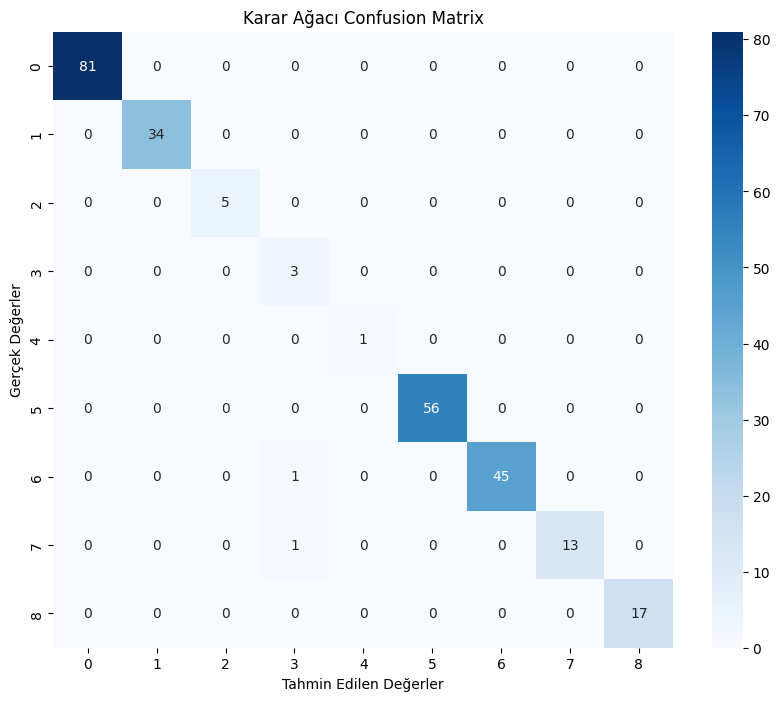

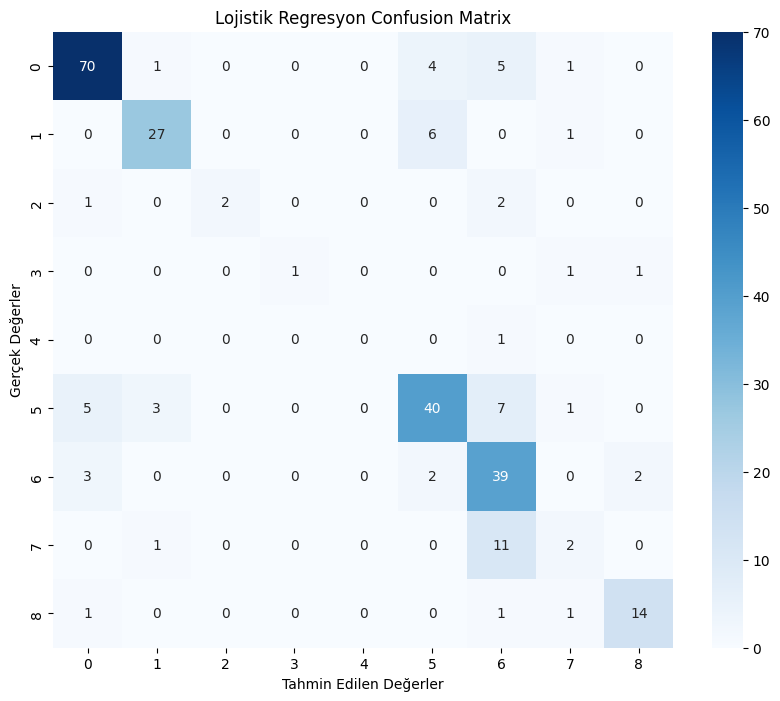

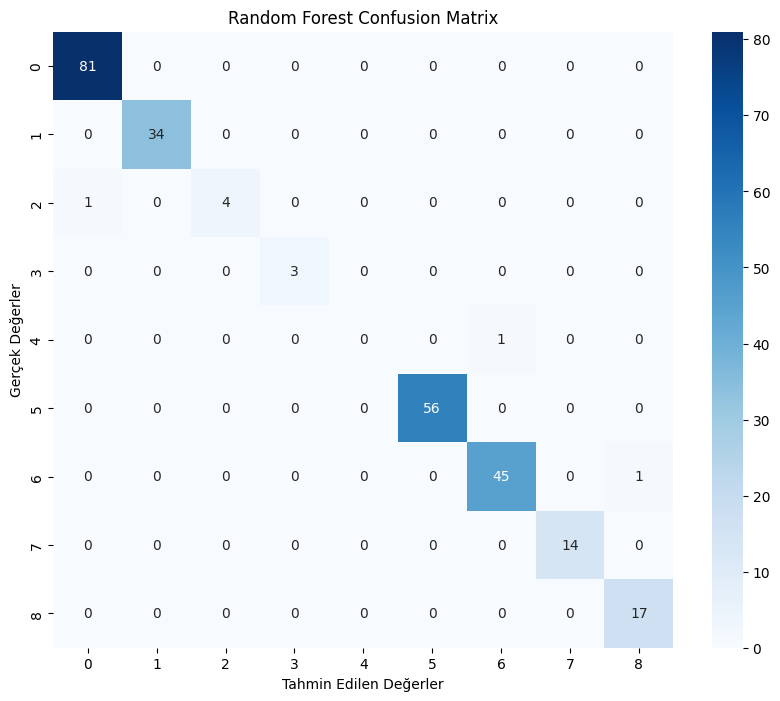

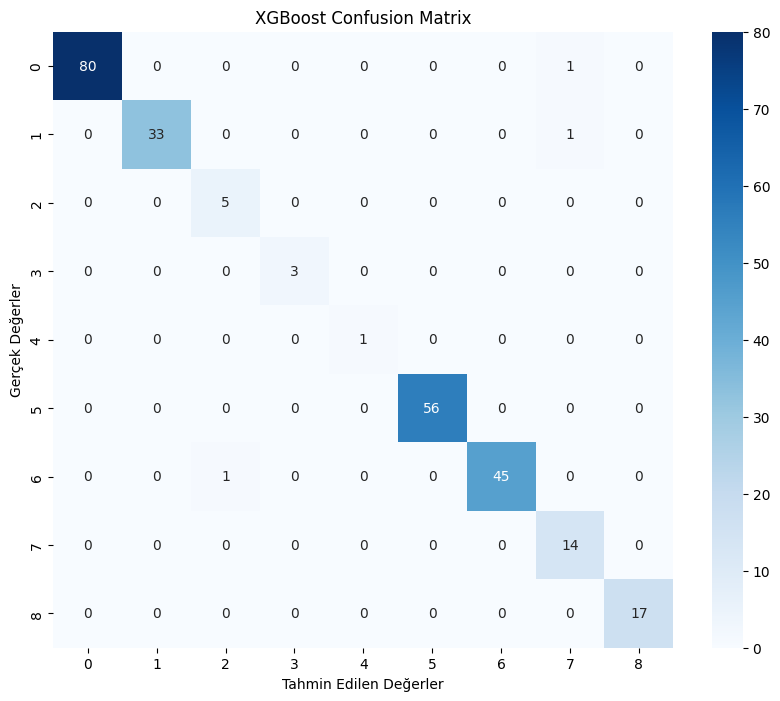

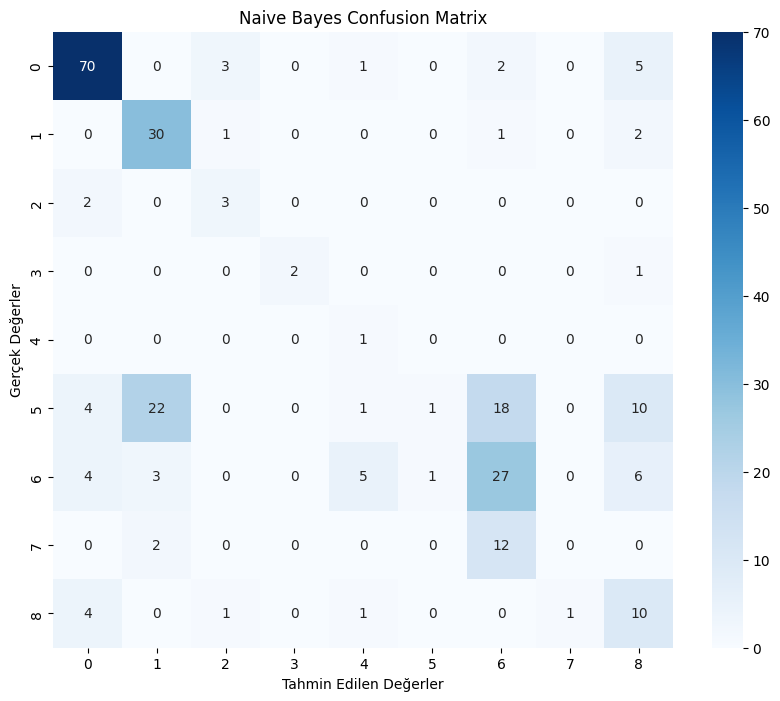

In [46]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.show()

models = {
    'Karar Ağacı': y_pred_dt,
    'Lojistik Regresyon': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'Naive Bayes': y_pred_nb
}

for name, predictions in models.items():
    plot_confusion_matrix(y_test, predictions, f'{name} Confusion Matrix')